# Ravi_1008312309_assignment1


# MIE1624H1 – Introduction to Data Science and Analytics – ASSIGNMENT – 1
***Gokul Ravi - Student Number 1008312309***

In [31]:
#installing pingouin library
!pip install pingouin

Defaulting to user installation because normal site-packages is not writeable


In [32]:
#importing libraries required pandas, matplotlib, numpy, scipy & pingouin
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as sp
import pingouin as pg

In [33]:
import sys
print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [34]:
#reading the data
table=pd.read_csv("clean_kaggle_data.csv")
table.head()

C:\Users\gokul\AppData\Local\Temp\ipykernel_4964\48802872.py:2: DtypeWarning: Columns (285) have mixed types. Specify dtype option on import or set low_memory=False.
  table=pd.read_csv("clean_kaggle_data.csv")


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
table1=table[["Q1", "Q2", "Q3", "Q4", "Q6","Q25"]] # new data
table1.head()

,Q1,Q2,Q3,Q4,Q6,Q25
0,50-54,Man,India,Bachelor’s degree,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,20+ years,40000
4,45-49,Man,India,Doctoral degree,< 1 years,40000


In [36]:
table1.describe()

,Q25
count,15391.000000
mean,49116.009356
std,98090.207788
min,1000.000000
25%,2000.000000
50%,15000.000000
75%,60000.000000
max,1000000.000000


# EXPLORATORY ANALYSIS

In [37]:
#creating a new datatset with only the age & degree. 
tableage=table1.groupby(["Q1","Q4"]).size()
tableage.head()

Q1     Q4                                  
18-21  Bachelor’s degree                       577
       Doctoral degree                           7
       I prefer not to answer                   24
       Master’s degree                         160
       No formal education past high school     23
dtype: int64

In [38]:
#the frequency of the degrees obtained per age group is computed
tableage=tableage.unstack()
tableage.head()

Q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
Q1,,,,,,,
18-21,577,7,24,160,23,5,135
22-24,1092,56,38,773,24,13,96
25-29,1146,225,68,1623,28,33,112
30-34,668,413,42,1338,37,44,84
35-39,445,419,46,933,27,42,80


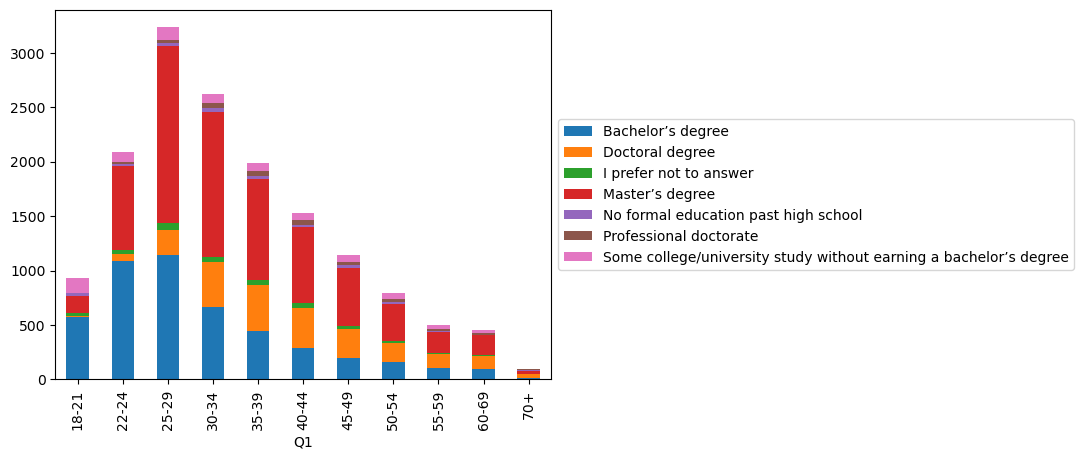

In [39]:
#stacked bar plot for the distribution of degrees in each age group is created and displayed
tableage.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 0, 'Professional Experience')

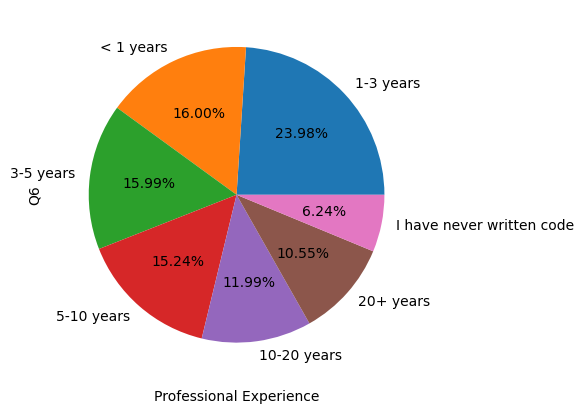

In [40]:
#a pie chart explaining the distribution of the professional experience among the respondents is shown.
experience=table["Q6"].value_counts()
experience.plot(kind='pie', autopct='%.2f%%')
plt.xlabel('Professional Experience')

Text(0.5, 0, 'Gender')

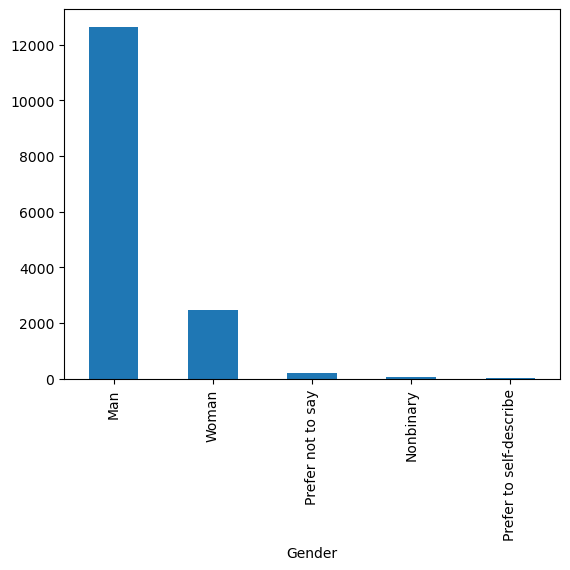

In [41]:
#a bar chart explaining the distribution of the gender among the respondents is shown.
gender=table["Q2"].value_counts()
gender.plot(kind='bar')
plt.xlabel('Gender')

# ANALYSIS BASED ON THE AVERAGE SALARY BETWEEN MEN AND WOMEN

In [42]:
# a new dataset contating the salary of men is created
question2man=table[["Q2","Q25"]]
question2man=question2man[question2man["Q2"]=="Man"]

In [43]:
# descriptive statistics of salary of men
question2man.describe()

,Q25
count,12642.000000
mean,51193.600696
std,99979.274378
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,60000.000000
max,1000000.000000


In [44]:
# a new dataset contating the salary of women is created
question2woman=table[["Q2","Q25"]]
question2woman=question2woman[question2woman["Q2"]=="Woman"]

In [45]:
# descriptive statistics of salary of women
question2woman.describe()

,Q25
count,2482.000000
mean,34816.881547
std,72017.347888
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,1000000.000000


In [46]:
woman=question2woman[["Q25"]]
woman.head()

,Q25
15,2000
17,30000
19,1000
22,10000
26,5000


In [47]:
man=question2man[["Q25"]]
man.head()

,Q25
0,30000
1,70000
2,1000
3,40000
4,40000


In [48]:
#LEVENE TEST for the datasets of the salary of men and women is performed. The homogenity of varience is checked here.
stats,p=sp.levene(woman.Q25,man.Q25)
print(stats,p)

if p > 0.05:
    print("The variances are homogeneous (fail to reject H0).")
else:
    print("The variances are not homogeneous (reject H0).")

47.0171552949757 7.309414887535396e-12
The variances are not homogeneous (reject H0).


In [49]:
#SHAPIRO TEST for the men salary dataset is performed. Here the normal distribution of the sample is checked.
stat, p = sp.shapiro(man.Q25)
print(stat,p)

if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")


0.4714226722717285 0.0
The sample does not look normally distributed (reject H0).


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
#SHAPIRO TEST for the women salary dataset is performed. Here the normal distribution of the sample is checked.
stat, p = sp.shapiro(woman.Q25)
print(stat,p)


if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")


0.46219897270202637 0.0
The sample does not look normally distributed (reject H0).


In [51]:
# WELCH TWO T TEST
t_stat, p_val = sp.ttest_ind(man.Q25, woman.Q25,equal_var=False)
print(t_stat, p_val)


if p_val < 0.05:
    print("Reject the null hypothesis - there is a significant difference")
else:
    print("Fail to reject the null hypothesis - there is no significant difference between the salaries of men and women")

9.649519756229287 7.952919386918026e-22
Reject the null hypothesis - there is a significant difference


In [52]:
#BOOTSTRAPPING MAN SALARY DATA

n_samples = 1000 # no:of replication
manboot = np.empty((n_samples,))

for i in range(n_samples):
    boot = man["Q25"].sample(frac=.10, replace=True)
    manboot[i] = boot.mean()
lower, upper = np.percentile(manboot, [2.5, 97.5])

print(lower, upper)


46088.993275316454 57036.29351265822


In [53]:
#BOOTSTRAPPING WOMAN SALARY DATA

n_samples = 1000 #no:of replication
womanboot = np.empty((n_samples,))
for i in range(n_samples):
    boot = woman["Q25"].sample(frac=.10, replace=True)
    womanboot[i] = boot.mean()
lower1, upper1 = np.percentile(womanboot, [2.5, 97.5])

print(lower1, upper1)


27249.14314516129 45503.780241935485


In [54]:
#here the list is being converted into a dataset.
manboot=pd.DataFrame(manboot,columns=["Salary"])
womanboot=pd.DataFrame(womanboot, columns=["Salary"])

In [55]:
#SHAPIRO TEST
stat, p = sp.shapiro(womanboot.Salary)
print(stat,p)


if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")


0.9800422787666321 1.782663877625268e-10
The sample does not look normally distributed (reject H0).


In [56]:
#SHAPIRO TEST
stat, p = sp.shapiro(manboot.Salary)
print(stat,p)

if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")

0.9967828392982483 0.039870478212833405
The sample does not look normally distributed (reject H0).


In [57]:
#LEVENE TEST
stats,p=sp.levene(manboot.Salary,womanboot.Salary)
print(stats,p)

if p > 0.05:
    print("The variances are homogeneous (fail to reject H0).")
else:
    print("The variances are not homogeneous (reject H0).")

173.4720262395976 4.73465111742972e-38
The variances are not homogeneous (reject H0).


In [58]:
#WELCH TWO T-TEST
t_stat, p_val = sp.ttest_ind(manboot.Salary, womanboot.Salary,equal_var=False)
print(t_stat, p_val) 

if p_val < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the two samples")
else:
    print("Fail to reject the null hypothesis - there is no significant difference between the two samples")

95.02563372724897 0.0
Reject the null hypothesis - there is a significant difference between the two samples


Text(0, 0.5, 'Frequency')

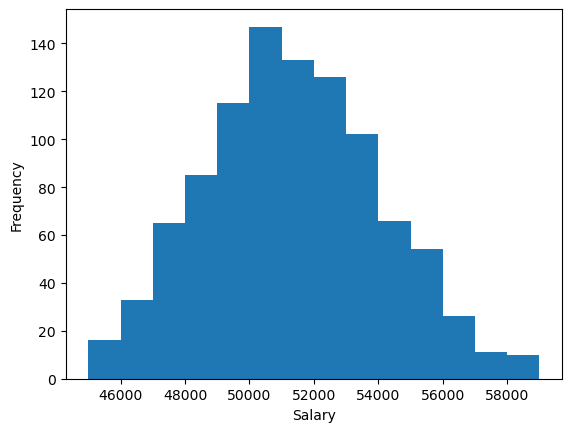

In [59]:
#histogram plot of the bootstrapped man salary
plt.hist(manboot,bins=np.arange(45000,60000,1000))
plt.xlabel("Salary")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

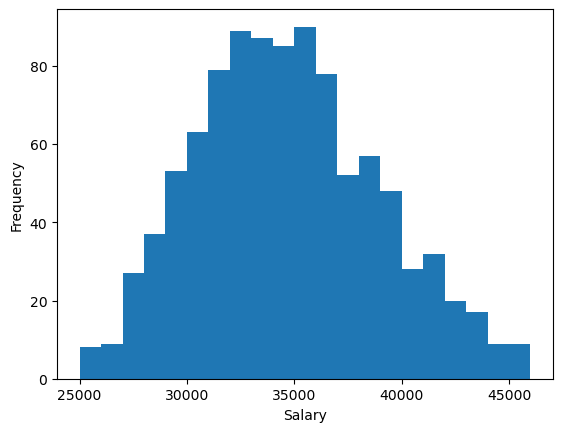

In [60]:
#histogram plot of the bootstrapped woman salary
plt.hist(womanboot,bins=np.arange(25000,47000,1000))
plt.xlabel("Salary")
plt.ylabel("Frequency")

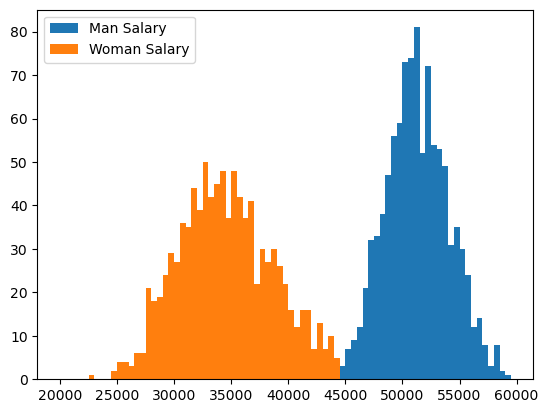

In [61]:
#histogram plot of the bootstrapped man salary
plt.hist(manboot,bins=np.arange(20000,60000,500),label="Man Salary")
plt.hist(womanboot,bins=np.arange(20000,45000,500),label="Woman Salary")
plt.legend()
plt.show()

<AxesSubplot:>

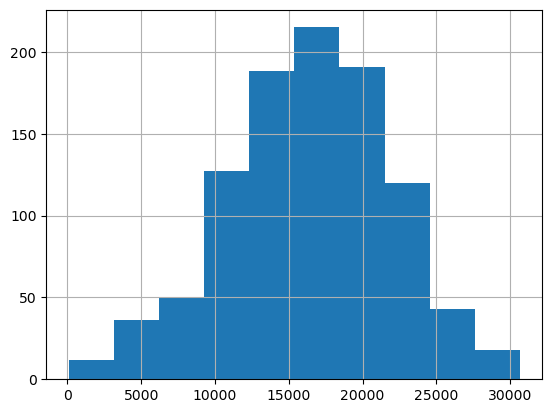

In [62]:
#difference of means plot
diff_gender=np.abs(manboot.Salary-womanboot.Salary)
diff_gender.hist()

# ANALYSIS BASED ON THE AVERAGE SALARY AND HIGHEST LEVEL OF EDUCATION

In [63]:
#creating a new dataset based on the salary of bachelor degree holders
question3bd=table[["Q4","Q25"]]
question3bd=question3bd[question3bd["Q4"]=="Bachelor’s degree"]
bd=question3bd.value_counts().sort_index()
question3bd.describe()

,Q25
count,4777.000000
mean,35578.291815
std,89382.060777
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,40000.000000
max,1000000.000000


In [64]:
#creating a new dataset based on the salary of master degree holders
question3md=table[["Q4","Q25"]]
question3md=question3md[question3md["Q4"]=="Master’s degree"]
md=question3md.value_counts().sort_index()
question3md.describe()

,Q25
count,6799.000000
mean,52706.868657
std,90928.786678
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,1000000.000000


In [65]:
#creating a new dataset based on the salary of doctoral degree holders
question3dd=table[["Q4","Q25"]]
question3dd=question3dd[question3dd["Q4"]=="Doctoral degree"]
dd=question3dd.value_counts().sort_index()
question3dd.describe()

,Q25
count,2217.000000
mean,70641.181777
std,117160.947589
min,1000.000000
25%,4000.000000
50%,40000.000000
75%,90000.000000
max,1000000.000000


In [66]:
md=question3md[["Q25"]]
bd=question3bd[["Q25"]]
dd=question3dd[["Q25"]]

In [67]:
#LEVENE TEST for the datasets before bootstrapping
stats,p=sp.levene(bd.Q25,md.Q25,dd.Q25)
print(stats,p)

if p > 0.05:
    print("The variances are homogeneous (fail to reject H0).")
else:
    print("The variances are not homogeneous (reject H0).")

79.54751302920215 4.47423511714484e-35
The variances are not homogeneous (reject H0).


In [68]:
#SHAPIRO TEST for Bachelors Dataset
stat, p = sp.shapiro(bd.Q25)
print(stat,p)

if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")


0.36212533712387085 0.0
The sample does not look normally distributed (reject H0).


In [69]:
#SHAPIRO TEST for Masters Dataset
stat, p = sp.shapiro(md.Q25)
print(stat,p)

if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")

0.5266775488853455 0.0
The sample does not look normally distributed (reject H0).


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [70]:
#SHAPIRO TEST for Doctoral Dataset
stat, p = sp.shapiro(dd.Q25)
print(stat,p)

if p > 0.05:
    print("The sample looks normally distributed (fail to reject H0).")
else:
    print("The sample does not look normally distributed (reject H0).")

0.5536705851554871 0.0
The sample does not look normally distributed (reject H0).


In [71]:
#merging all three datasets to perform Welch Anova
mergedata=pd.concat([question3bd,question3md,question3dd])

In [72]:
mergedata.head()

,Q4,Q25
0,Bachelor’s degree,30000
5,Bachelor’s degree,20000
9,Bachelor’s degree,1000
11,Bachelor’s degree,3000
12,Bachelor’s degree,1000


In [73]:
#Welch Anova
aov = pg.welch_anova(data=mergedata, dv='Q25', between='Q4')
print(aov)

  Source  ddof1        ddof2          F         p-unc       np2
0     Q4      2  5570.351587  96.621721  5.612779e-42  0.015669


In [74]:
#BOOTSTRAPPING Bachelor Degree SALARY DATA

n_samples = 1000

bdboot = np.empty((n_samples,))

for i in range(n_samples):
    boot = bd["Q25"].sample(frac=.10, replace=True)
    bdboot[i] = boot.mean()

lower, upper = np.percentile(bdboot, [2.5, 97.5])

print(lower, upper)


28321.02510460251 44238.441422594144


In [75]:
#BOOTSTRAPPING Master Degree SALARY DATA

n_samples = 1000


mdboot = np.empty((n_samples,))


for i in range(n_samples):
    boot = md["Q25"].sample(frac=.10, replace=True)
    mdboot[i] = boot.mean()


lower, upper = np.percentile(mdboot, [2.5, 97.5])

print(lower, upper)

46174.76102941177 59721.268382352944


In [76]:
#BOOTSTRAPPING Doctoral Degree SALARY DATA

n_samples = 1000

ddboot = np.empty((n_samples,))

for i in range(n_samples):
    boot = dd["Q25"].sample(frac=.10, replace=True)
    ddboot[i] = boot.mean()

lower, upper = np.percentile(ddboot, [2.5, 97.5])

print(lower, upper)

56880.3490990991 86262.72522522522


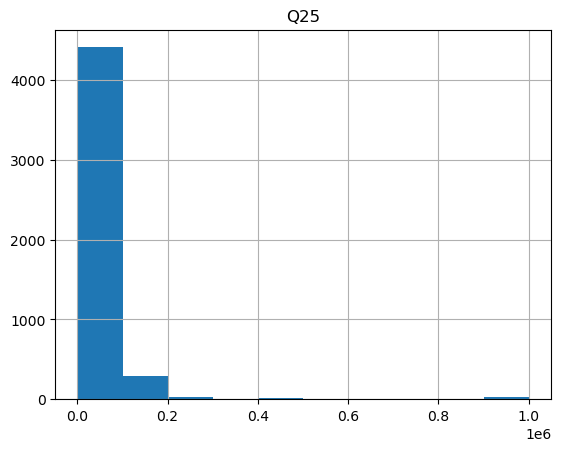

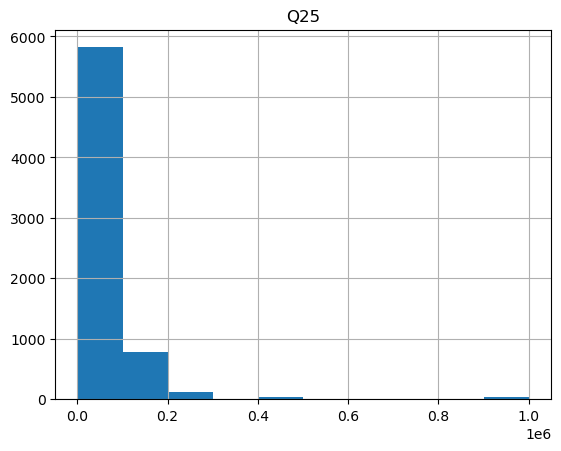

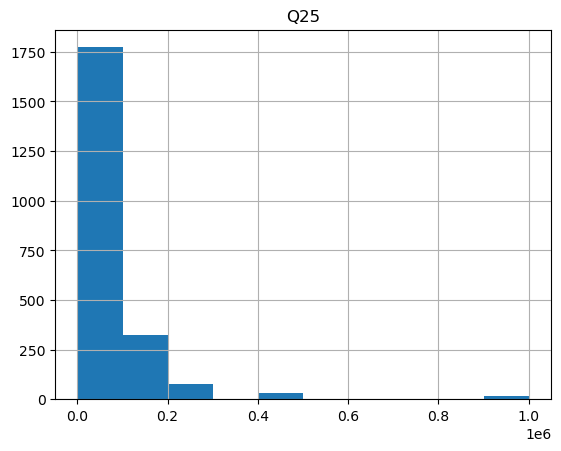

In [77]:
#plotting the actual datasets of Bachelor, Master & Doctoral
bd.hist()
md.hist()
dd.hist()
plt.show()

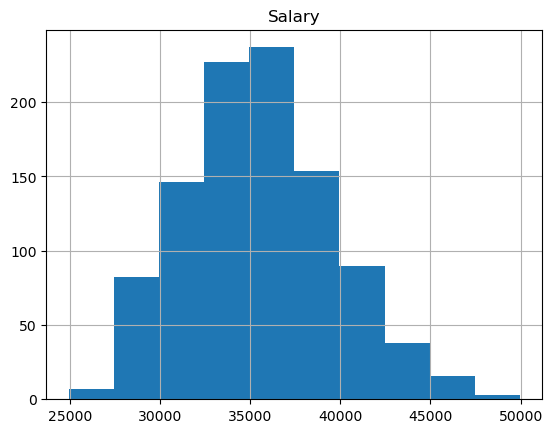

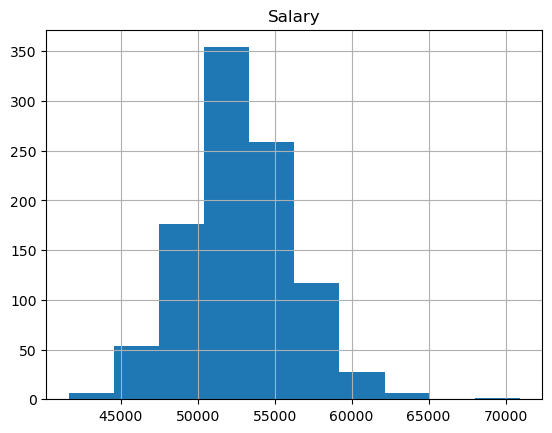

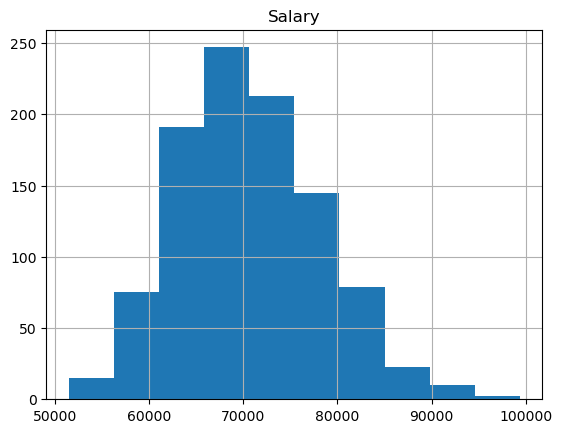

In [78]:
#Plotting the Bootstrapped Data of Salaries of Bachelors, Masters & Doctoral Degrees respectively
bdboot=pd.DataFrame(bdboot,columns=["Salary"])
mdboot=pd.DataFrame(mdboot,columns=["Salary"])
ddboot=pd.DataFrame(ddboot,columns=["Salary"])
bdboot.hist()
mdboot.hist()
ddboot.hist()
plt.show()

In [79]:
#SCIPY ANOVA for Bootstrapped Data
f_value,p_value=sp.f_oneway(bdboot,mdboot,ddboot)
print(f_value,p_value)

[10747.04916348] [0.]


In [80]:
#LEVENE TEST for Bootstrapped Datasets
stats,p=sp.levene(bdboot.Salary,mdboot.Salary,ddboot.Salary)
print(stats,p)

if p > 0.05:
    print("The variances are homogeneous (fail to reject H0).")
else:
    print("The variances are not homogeneous (reject H0).")

297.7161310388138 1.162211766750728e-118
The variances are not homogeneous (reject H0).


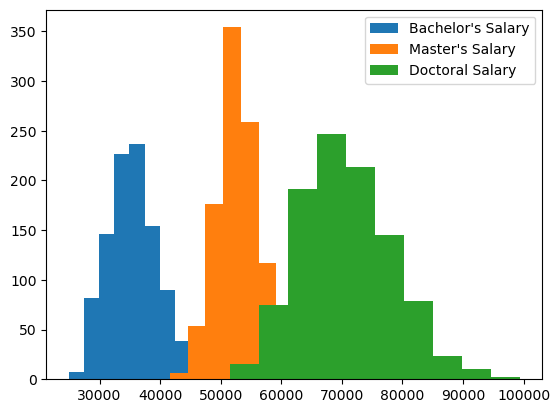

In [84]:
#plotting the bootstrapped datasets in a single graph
plt.hist(bdboot,label="Bachelor's Salary")
plt.hist(mdboot,label="Master's Salary")
plt.hist(ddboot,label="Doctoral Salary")
plt.legend()
plt.show()

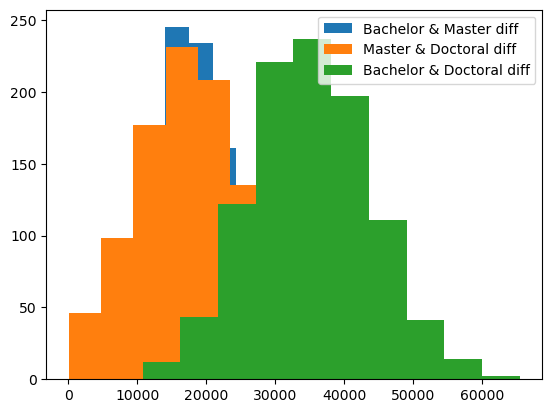

In [85]:
#plotting the difference between the means of the bootstrapped datasets in a single graph
diff_bm=np.abs(bdboot.Salary-mdboot.Salary)
diff_md=np.abs(mdboot.Salary-ddboot.Salary)
diff_db=np.abs(ddboot.Salary-bdboot.Salary)
plt.hist(diff_bm,label="Bachelor & Master diff")
plt.hist(diff_md,label="Master & Doctoral diff")
plt.hist(diff_db,label="Bachelor & Doctoral diff")
plt.legend()
plt.show()